# Prototipo 3

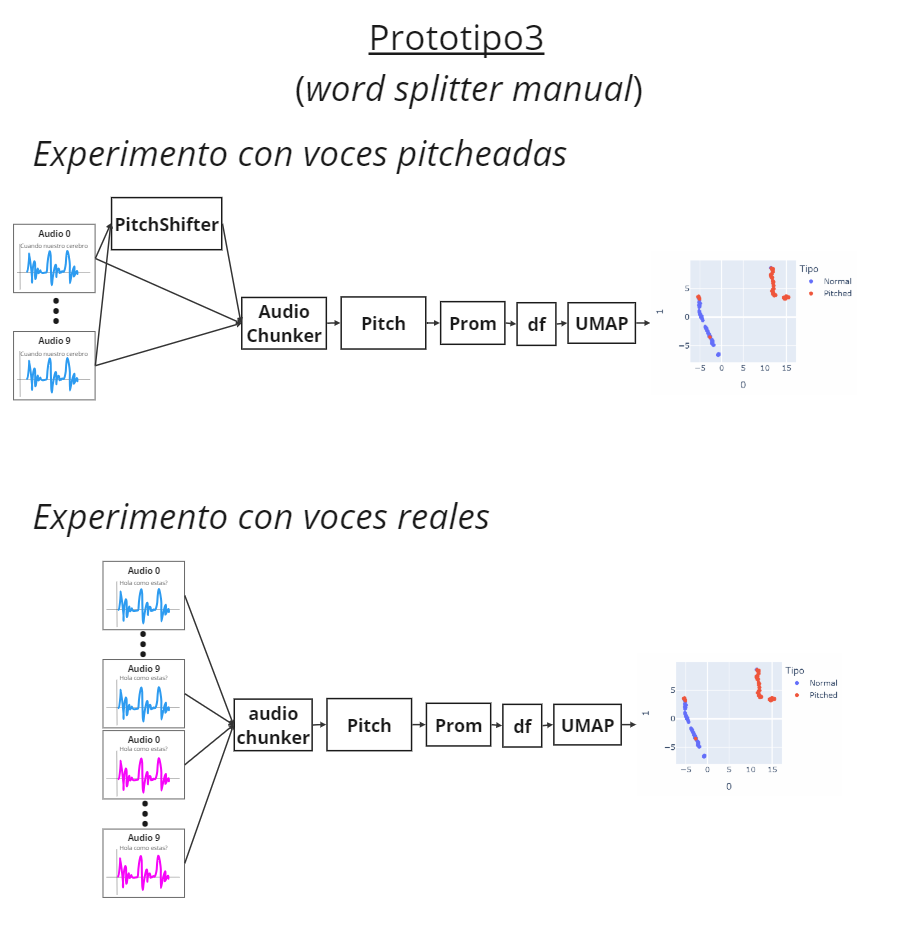

## Funciones

### Calculadora de pitch

In [9]:
import librosa
import math

def Pitch(y,sr):
    f0, voiced_flag, voiced_probs=librosa.pyin(
        y,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C7'),
        sr=sr)
    f0 = [x for x in f0 if not isinstance(x, float) or not math.isnan(x)]
    f0 = [i for i in f0 if i != 0]
    return f0

### Promediador

In [10]:
import numpy as np

def Promediador(x):
    return np.mean(x)

### Calculadora de Loudness

In [11]:
import pyloudnorm as pyln

def Loudness(y,sr):
    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    return loudness

## Función cargar los parámetros acústicos a un df

In [12]:
import pandas as pd

def CalcularYCargarParametrosAcusticosAldf(path_carpeta, nombre, cant_audios, extension, cant_basesdedatos):
    df = pd.DataFrame(columns=['Pitch', 'Loudness','Tipo'])
    for j in range(cant_basesdedatos):
        for i in range(cant_audios):
            path = f'{path_carpeta}/{nombre[j]}{i}.{extension[j]}'    
            y,sr = librosa.load(path)
            p=Promediador(Pitch(y,sr))
            l=Promediador(Loudness(y,sr))
            if j==0:
                variable_tipo = 'Normal' 
            elif j==1:
                variable_tipo = 'Pitched'
            df = df.append({'Pitch':p, 'Loudness':l,'Tipo':variable_tipo},ignore_index=True)
    return df

## AudioChunker

In [42]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

def AudioChunker(chunk_name,raw_audio_path,chunk_storage_directory,min_silence_len,silence_thresh):
    sound_file = AudioSegment.from_wav(raw_audio_path)
    audio_chunks = split_on_silence(
        sound_file,
        min_silence_len,
        silence_thresh = sound_file.dBFS-silence_thresh
        )
    for i, chunk in enumerate(audio_chunks):
        out_file = f"{chunk_storage_directory}/chunk{i}_de_{chunk_name}.wav"
        print(f'Audio{i}', out_file)
        chunk.export(out_file, format="wav")

## Recortar todas las palabras

In [43]:
def RecortarTodasLasPalabras(
        chunk_names,
        raw_audio_main_path,
        raw_audio_main_path_name,
        chunk_storage_main_directory,
        chunk_storage_main_directory_names,
        min_silence_len,silence_thresholds
        ): 
    
    for i in range(len(chunk_names)):
        chunk_name = chunk_names[i]
        raw_audio_path = f'{raw_audio_main_path}/{raw_audio_main_path_name[i]}.wav'
        chunk_storage_directory = f'{chunk_storage_main_directory}/{chunk_storage_main_directory_names[i]}'
        AudioChunker(chunk_name,raw_audio_path,chunk_storage_directory,min_silence_len,silence_thresholds[i]) 

In [44]:
chunk_names = ['E','V','N']

raw_audio_main_path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/Zero_padding'
raw_audio_main_path_name = ['E_zero_padding','V_zero_padding','N_zero_padding']

chunk_storage_main_directory = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual'
chunk_storage_main_directory_names = ['ChunksE','ChunksV','ChunksN']

min_silence_len = 1000 

silence_thresholds = [10,15,15]
RecortarTodasLasPalabras(chunk_names,raw_audio_main_path,raw_audio_main_path_name,chunk_storage_main_directory,chunk_storage_main_directory_names,min_silence_len,silence_thresholds)

Audio0 C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/ChunksE/chunk0_de_E.wav
Audio1 C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/ChunksE/chunk1_de_E.wav
Audio2 C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/ChunksE/chunk2_de_E.wav
Audio3 C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/ChunksE/chunk3_de_E.wav
Audio4 C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/ChunksE/chunk4_de_E.wav
Audio5 C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/ChunksE/chunk5_de_E.wav
Audio6 C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/ChunksE/chunk6_de_E.wav
Audio7 C:/Use

In [ ]:
path_carpeta = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo2/Audios'
nombre = ['HolaComoEstas','HolaComoEstasPitched']
extension = ['opus','wav']
cant_audios = 56
cant_basesdedatos = 2

BaseDeDatos=CalcularYCargarParametrosAcusticosAldf(path_carpeta,nombre,cant_audios,extension,cant_basesdedatos)

### PitchShifter

In [ ]:
import torch
import torchaudio
import soundfile as sf

def PitchShifter(input_file_path,output_file_path,semi_tonos):
    audio,sr = sf.read(input_file_path)
    audio = torch.tensor(audio)
    y= torchaudio.functional.pitch_shift(
        waveform = audio,
        sample_rate = sr,
        n_steps=semi_tonos)
    sf.write(output_file_path, y,samplerate=sr)

In [ ]:
input_file_main_path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/AudiosPrototipo3/AudiosWordSplitterManual/Crudo/'
input_file_main_path_name = ['E_crudo',]
output_file_path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo3/Gohan.wav'
semi_tonos = 8
def PitchearTodosLosAudios(input_file_path,output_file_path,semi_tonos):
    PitchShifter(input_file_path,output_file_path,semi_tonos)

## Clustering

In [ ]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()
pitch = BaseDeDatos['Pitch']
pitch = np.asarray(pitch)
pitch = pitch.reshape(-1, 1)
scaled_pitch = StandardScaler().fit_transform(pitch) # estandariza los valores

embedding = reducer.fit_transform(pitch) 

## Ploteo

In [ ]:
import plotly.express as px

fig = px.scatter(
    embedding, x=0, y=1,
    color=BaseDeDatos.Tipo, labels={'color': 'Tipo'}
)

fig.update_layout(
    autosize=True,
    width=800,
    height=500,
)
fig.show()